# Práctica 3
**Ajusta por mínimos cuadrados dos modelos de la forma**
$$
1)    log(y) = log(b) + alog(x)
$$

$$
2)    log(y) = log(b) + alog(x) + c(log(x))^2
$$

---

### Ejercicio 1
### Importar librerías y leer datos

In [248]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint

datos = np.loadtxt('datos_ejercicio_4.txt', skiprows=1)
y = datos[:, 1]
x = datos[:, 0]
mpoints, = x.shape

### Función para calcular ecm

In [249]:
ECM = lambda y, _y: sum( (y - _y)**2)/len(y)

### Ocupo `_y` para referirme a $\hat{y}$

### Modelo 1
$$
log(y) = log(b) + alog(x)
$$

$$
\textrm{ sea } z = log(y), w = log(b)
$$

$$
\textrm{ ajustar: } z = w + a log(x)
$$


In [250]:
phi_modelo_1 = lambda var: np.log(var) 
z = np.log(y)

In [251]:
mpoints_modelo_1, = x.shape
A_modelo_1 = np.ones((mpoints_modelo_1,2))
A_modelo_1[:,1] = phi_modelo_1(x)
Q,R = np.linalg.qr(A_modelo_1)
beta = np.linalg.solve(R,Q.T@z)
print(beta)

[0.26464764 0.5756426 ]


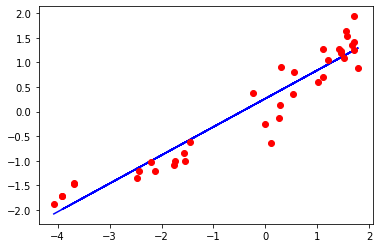

In [252]:
z_ajustadas = beta[0] + beta[1]*phi_1(x)
plt.plot(np.log(x), z_ajustadas, 'b-', np.log(x),np.log(y),'ro')

In [253]:
ec = ECM(np.log(y), z_ajustadas)
print("ECM = ",ec)

ECM =  0.116756077528369


---



### Ejercicio 2
$$
log(y) = log(b) + alog(x) + c(log(x))^2
$$

In [254]:
z = np.log(y)
phi_1 = lambda var: np.log(var) 
phi_2 = lambda var: np.power(phi_1(var),2)

A_modelo_2 = np.ones((mpoints, 3))
A_modelo_2[:, 1] = phi_1(x)
A_modelo_2[:, 2] = phi_2(x)

Q_modelo_2,R_modelo_2 = np.linalg.qr(A_modelo_2) 
beta_modelo_2 = np.linalg.solve(R_modelo_2, Q_modelo_2.T@z)

z_ajustadas_modelo_2 = beta_modelo_2[0] + beta_modelo_2[1]*phi_1(x) + beta_modelo_2[2]*phi_2(x)

beta_modelo_2

array([0.04962021, 0.70062919, 0.06695492])

In [255]:
'''
x_eval_log_m2 = np.linspace(np.min(np.log(x)), np.max(np.log(x)), 1000)
x_eval_log2_m2 = np.power(x_eval_log_m2,2)
y_eval_log_m2 = beta_modelo_2[0] + beta_modelo_2[1]*x_eval_log_m2 + beta_modelo_2[2]*x_eval_log2_m2 
'''

x_values = np.linspace(np.min(np.log(x)), np.max(np.log(x)), 1000)
y_eval_cuad = x_values ** 2
y_ajustadas = beta_modelo_2[0] + beta_modelo_2[1]*x_values + beta_modelo_2[2]*y_eval_cuad


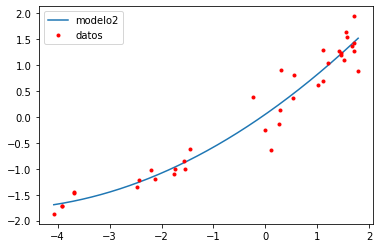

In [256]:
plt.plot(x_values, y_ajustadas, '-',np.log(x),np.log(y),'r.')
plt.legend(['modelo2', 'datos'], loc="best")
           